## Import the Dataset

using pandas library
Installing pandas: pip install pandas

In [2]:
### Import pandas
import pandas as pd

## load the dataset
dataset=pd.read_csv("dhaka_homeprices.csv")

In [3]:
## Information of the dataset
        # Sample
        # How many features
        # True Target

print("Shape of The Dataset",dataset.shape)
print("Number of Row: ", dataset.shape[0])
print("Number of Column: ", dataset.shape[1])

# print("Column's Name:", dataset[:-1])

Shape of The Dataset (15, 2)
Number of Row:  15
Number of Column:  2


In [4]:
## Duplicate check
dataset.duplicated() ## True/False      True-- Particulatar value has duplicate

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11     True
12     True
13     True
14     True
dtype: bool

In [5]:
print(dataset.duplicated().sum())

5


In [6]:
dataset=dataset.drop_duplicates()

In [7]:
print(dataset.duplicated().sum())

0


In [8]:
print("Number of Row: ", dataset.shape[0])
print("Number of Column: ", dataset.shape[1])

Number of Row:  10
Number of Column:  2


In [9]:
print("Columns Name: ", dataset.columns)

Columns Name:  Index(['area', 'price'], dtype='object')


In [25]:
print("Features: ", dataset.columns[0])
print("True Target:", dataset.columns[1])

Features:  area
True Target: price


In [28]:
## All the information
print("Shape of the Dataset: ", dataset.shape)
print("Total number of Sample/ Row:",dataset.shape[0])
print("Total number of Features/ Column:",dataset.shape[1])
print("Comumns Name: ", dataset.columns)
print("Features: ",dataset.columns[0])
print("True Target: ", dataset.columns[1])

Shape of the Dataset:  (9, 2)
Total number of Sample/ Row: 9
Total number of Features/ Column: 2
Comumns Name:  Index(['area', 'price'], dtype='object')
Features:  area
True Target:  price


In [10]:
### Null value check
print(dataset.isnull())

     area  price
0   False  False
1   False  False
2   False  False
3   False  False
4   False   True
5   False  False
6   False  False
8   False  False
9   False  False
10  False  False


In [11]:
print(dataset.isnull().sum())


area     0
price    1
dtype: int64


In [12]:
### Null value handeling/ Missing Value technique 1: Drop The sample
        # When to use? 
        # Dataset: Extreamly Learge
        # Null value value etrimly low
dataset=dataset.dropna()

In [13]:
print(dataset.isnull().sum())

area     0
price    0
dtype: int64


In [14]:
### Feature & True Target Extract

# x=dataset["area"]
# y=dataset["price"]


x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1:]

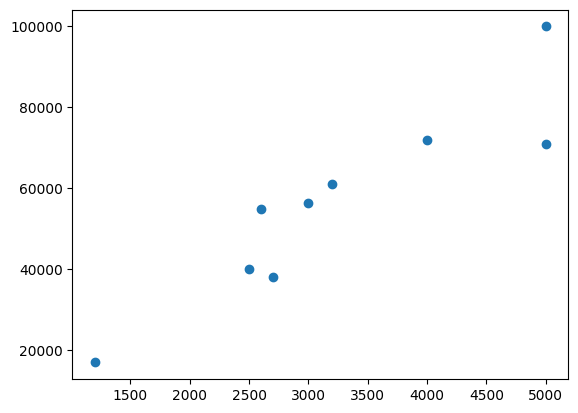

In [15]:
### Dataset visualization

### Scatter plot
    # matplotlib
    # seaborn

## Define you x---(Featers), y (True Target)


## import matplotlib and then access pyplot library
import matplotlib.pyplot as plt

plt.scatter(x=x, y=y)


## Model Train

        install scikit learn: pip install scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression   ## from sklearn library, there Linear model, we import Linear Regresseion

model=LinearRegression()

In [17]:
model.fit(x,y)

LinearRegression()

In [18]:
print("The Value of M: "),model.coef_

The Value of M: 


(None, array([[17.75912144]]))

In [19]:
print("The value of B: ",model.intercept_)

The value of B:  [-896.26066437]


## Now we have the line and let see what are the predicted value

In [20]:
y_hat= model.predict(x)

In [21]:
print("Y =",y)
print("H_hat = ", y_hat)

Y =        price
0    55000.0
1    56500.0
2    40000.0
3    61000.0
5    72000.0
6    71000.0
8    38000.0
9    17000.0
10  100000.0
H_hat =  [[45277.45507352]
 [52381.10364858]
 [43501.54292975]
 [55932.9279361 ]
 [70140.22508622]
 [87899.34652387]
 [47053.36721728]
 [20414.68506081]
 [87899.34652387]]


In [22]:
print("Y =",y)
print("H_hat = ", y_hat.flatten())

Y =        price
0    55000.0
1    56500.0
2    40000.0
3    61000.0
5    72000.0
6    71000.0
8    38000.0
9    17000.0
10  100000.0
H_hat =  [45277.45507352 52381.10364858 43501.54292975 55932.9279361
 70140.22508622 87899.34652387 47053.36721728 20414.68506081
 87899.34652387]


In [23]:
data=pd.DataFrame({"Actual Y":y, "Predicted Y_hat":y_hat.flatten()})
data

ValueError: Data must be 1-dimensional, got ndarray of shape (9, 1) instead

In [58]:
import numpy as np
# print(np.array(x.shape))
x=np.array(x)

data=pd.DataFrame({"Feature (x)":x.flatten(),"Actual Y":y, "Predicted Y_hat":y_hat.flatten()})
data

,Feature (x),Actual Y,Predicted Y_hat
0,2600,55000.0,45277.455074
1,3000,56500.0,52381.103649
2,2500,40000.0,43501.542930
3,3200,61000.0,55932.927936
4,4000,72000.0,70140.225086
5,5000,71000.0,87899.346524
6,2700,38000.0,47053.367217
7,1200,17000.0,20414.685061
8,5000,100000.0,87899.346524


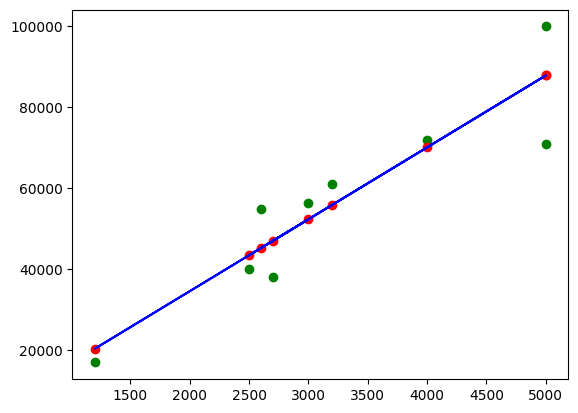

In [59]:
plt.scatter(x=x, y=y, c="Green")
plt.scatter(x=x, y=y_hat.flatten(),c="Red")
plt.plot(x,y_hat.flatten(), c="Blue")

In [67]:
loss1=abs(y-y_hat.flatten())
loss1

array([ 9722.54492648,  4118.89635142,  3501.54292975,  5067.0720639 ,
        1859.77491378, 16899.34652387,  9053.36721728,  3414.68506081,
       12100.65347613])

In [68]:
loss2=np.square(y-y_hat.flatten())
loss2

array([9.45278798e+07, 1.69653072e+07, 1.22608029e+07, 2.56752193e+07,
       3.45876273e+06, 2.85587913e+08, 8.19634580e+07, 1.16600741e+07,
       1.46425815e+08])

In [69]:
lossData=pd.DataFrame({"Actual y":y, "Predicted y_hat":y_hat.flatten(), "MAE":loss1, "MSE":loss2})

lossData

,Actual y,Predicted y_hat,MAE,MSE
0,55000.0,45277.455074,9722.544926,9.452788e+07
1,56500.0,52381.103649,4118.896351,1.696531e+07
2,40000.0,43501.542930,3501.542930,1.226080e+07
3,61000.0,55932.927936,5067.072064,2.567522e+07
4,72000.0,70140.225086,1859.774914,3.458763e+06
5,71000.0,87899.346524,16899.346524,2.855879e+08
6,38000.0,47053.367217,9053.367217,8.196346e+07
7,17000.0,20414.685061,3414.685061,1.166007e+07
8,100000.0,87899.346524,12100.653476,1.464258e+08


In [74]:
maeCost=loss1.sum()/dataset.shape[0]
maeCost

np.float64(7304.209273713722)

In [75]:
mseCost=loss2.sum()/dataset.shape[0]
mseCost

np.float64(75391692.38216251)

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

maeLoss= mean_absolute_error(y,y_hat)
print("MAE LOSS: ",maeLoss)

mseLoss=mean_squared_error(y,y_hat)
print("Mean Squire Error: ",mseLoss)

MAE LOSS:  7304.209273713722
Mean Squire Error:  75391692.38216251
